In [1]:
# Librerias
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore


# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:

import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('house_data.xlsx')

# Print the DataFrame
df.head(-10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21598,8956200760,20141013T000000,541800,4,2.50,3118,7866,2.0,0,2,...,9,3118,0,2014,0,98001,47.2931,-122.264,2673,6500
21599,7202300110,20140915T000000,810000,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21600,249000205,20141015T000000,1537000,5,3.75,4470,8088,2.0,0,0,...,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964
21601,5100403806,20150407T000000,467000,3,2.50,1425,1179,3.0,0,0,...,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253


Descipcion de los datos

id: Un identificador único para cada registro.

date: La fecha en la que se registró la transacción de la vivienda.

price: El precio de la vivienda.

bedrooms: El número de dormitorios en la vivienda.

bathrooms: El número de baños en la vivienda.

sqft_lot: El área en pies cuadrados del terreno asociado con la vivienda.

floors: El número de pisos en la vivienda.

waterfront: Indicador binario que indica si la vivienda tiene vista al agua (1 si es verdadero, 0 si es falso).

view: Un índice que representa la calidad de la vista desde la vivienda.

grade: Un índice que representa el nivel de construcción y diseño de la vivienda.

sqft_above: El área en pies cuadrados sobre el nivel del suelo. Indica la cantidad de espacio habitable que no está en el sótano.

sqft_basement: El área en pies cuadrados del sótano. Representa la cantidad de espacio habitable ubicado en el sótano.

yr_built: El año de construcción de la vivienda. Indica cuándo se construyó originalmente la casa.

yr_renovated: El año en que se realizó la última renovación de la vivienda. Si no hay renovaciones, el valor puede ser cero o algún otro indicador.

zipcode: El código postal de la ubicación de la vivienda. Proporciona información sobre la zona geográfica.

lat: La latitud de la ubicación de la vivienda. Es la coordenada geográfica que indica la posición norte-sur.

long: La longitud de la ubicación de la vivienda. Es la coordenada geográfica que indica la posición este-oeste.

sqft_living15: El área en pies cuadrados de la superficie habitable de las 15 viviendas más cercanas. Este valor proporciona información sobre el tamaño promedio de las viviendas cercanas.

sqft_lot15: El área en pies cuadrados del terreno de las 15 viviendas más cercanas. Este valor proporciona información sobre el tamaño promedio de los lotes de terreno de las viviendas cercanas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Aplicar la conversión a objetos datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
# Truncar a solo día, mes y año
df['date'] = df['date'].dt.date
df['date'] = pd.to_datetime(df['date'])
df.head(-5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,2014-08-25,507250,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,2015-01-26,429000,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,2014-10-14,610685,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,2015-03-26,1007500,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


In [8]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [9]:
cantidad_duplicados = df.duplicated().sum()

# Mostrar la cantidad de duplicados
print("Cantidad de duplicados:", cantidad_duplicados)

Cantidad de duplicados: 0


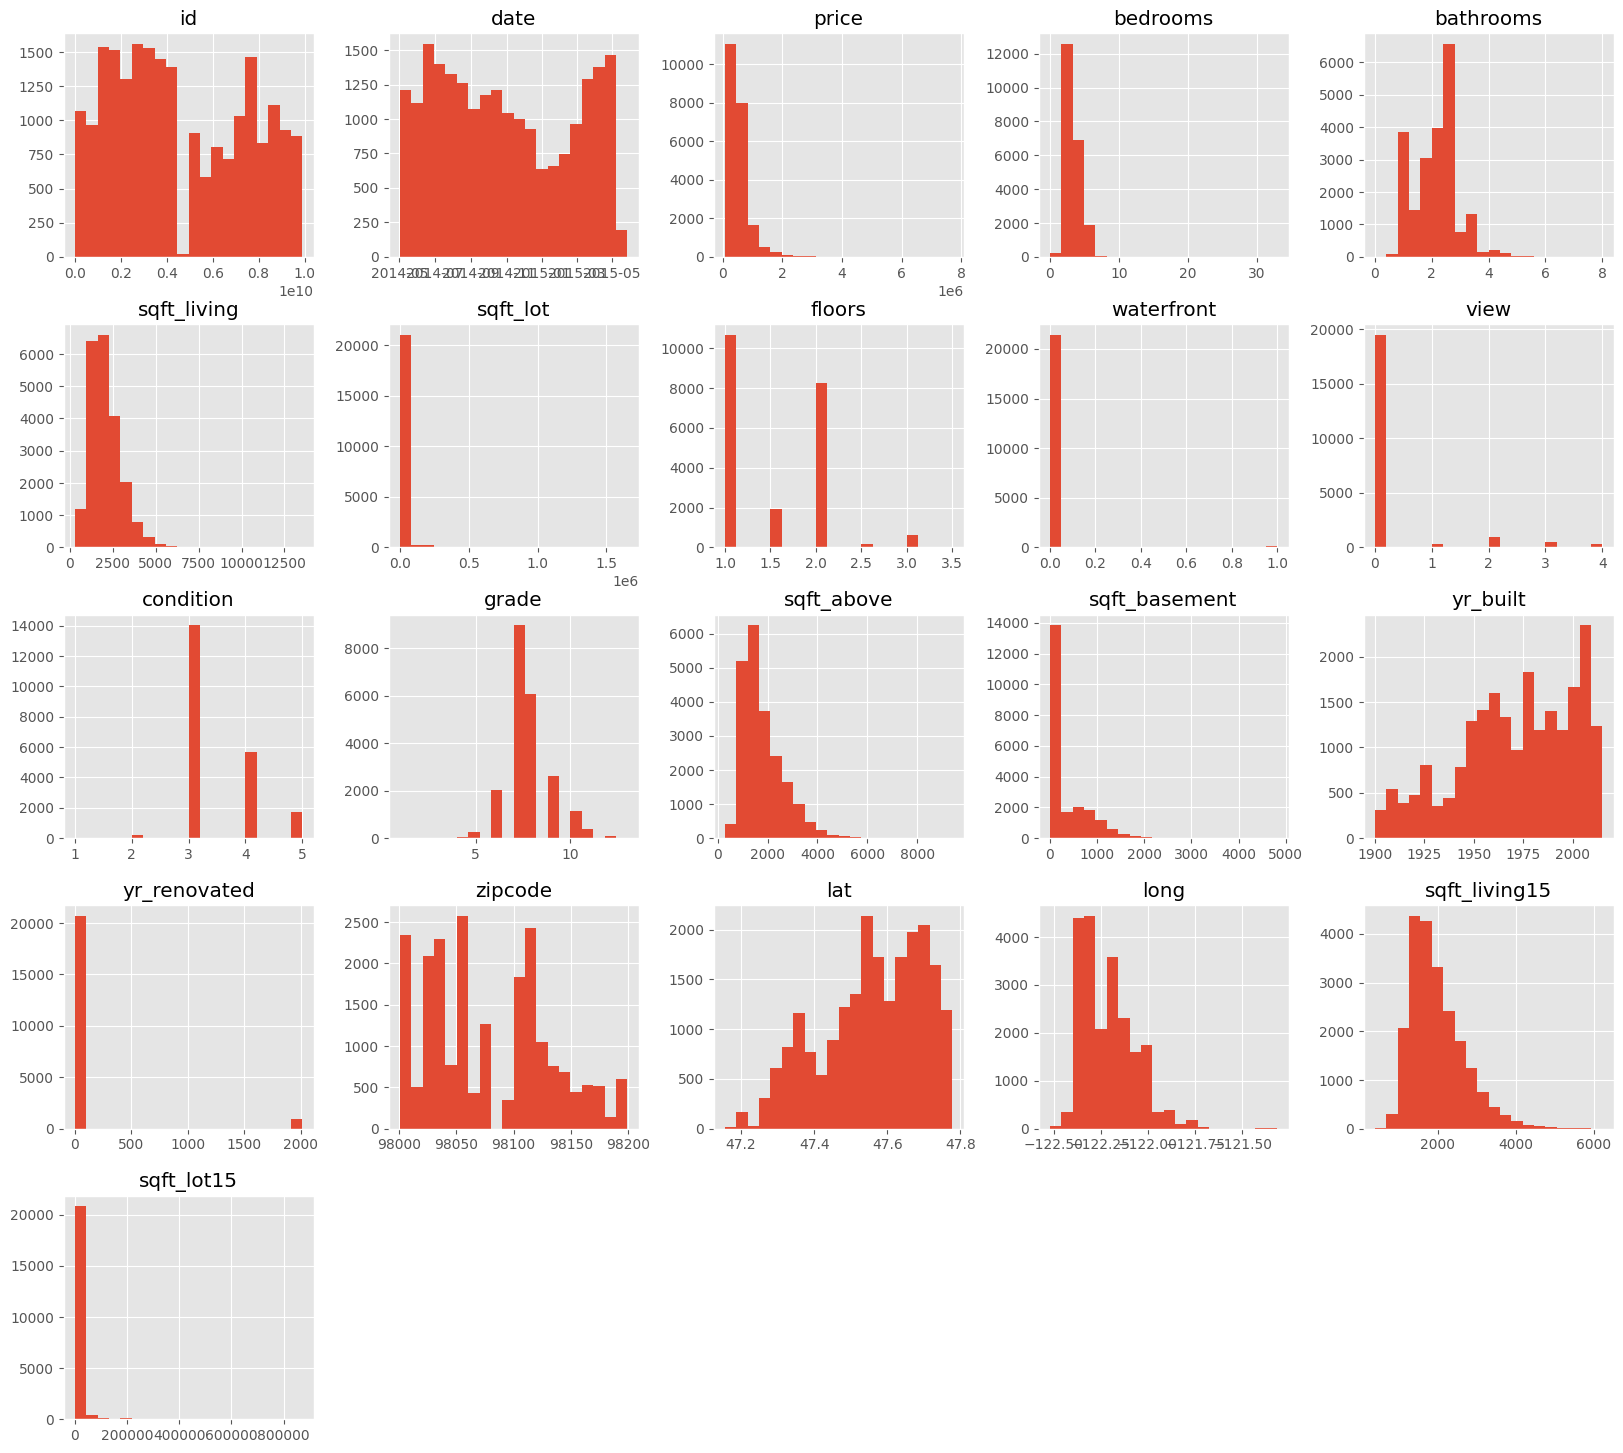

In [10]:
df.hist(figsize=(20, 18), bins=20)
plt.show()

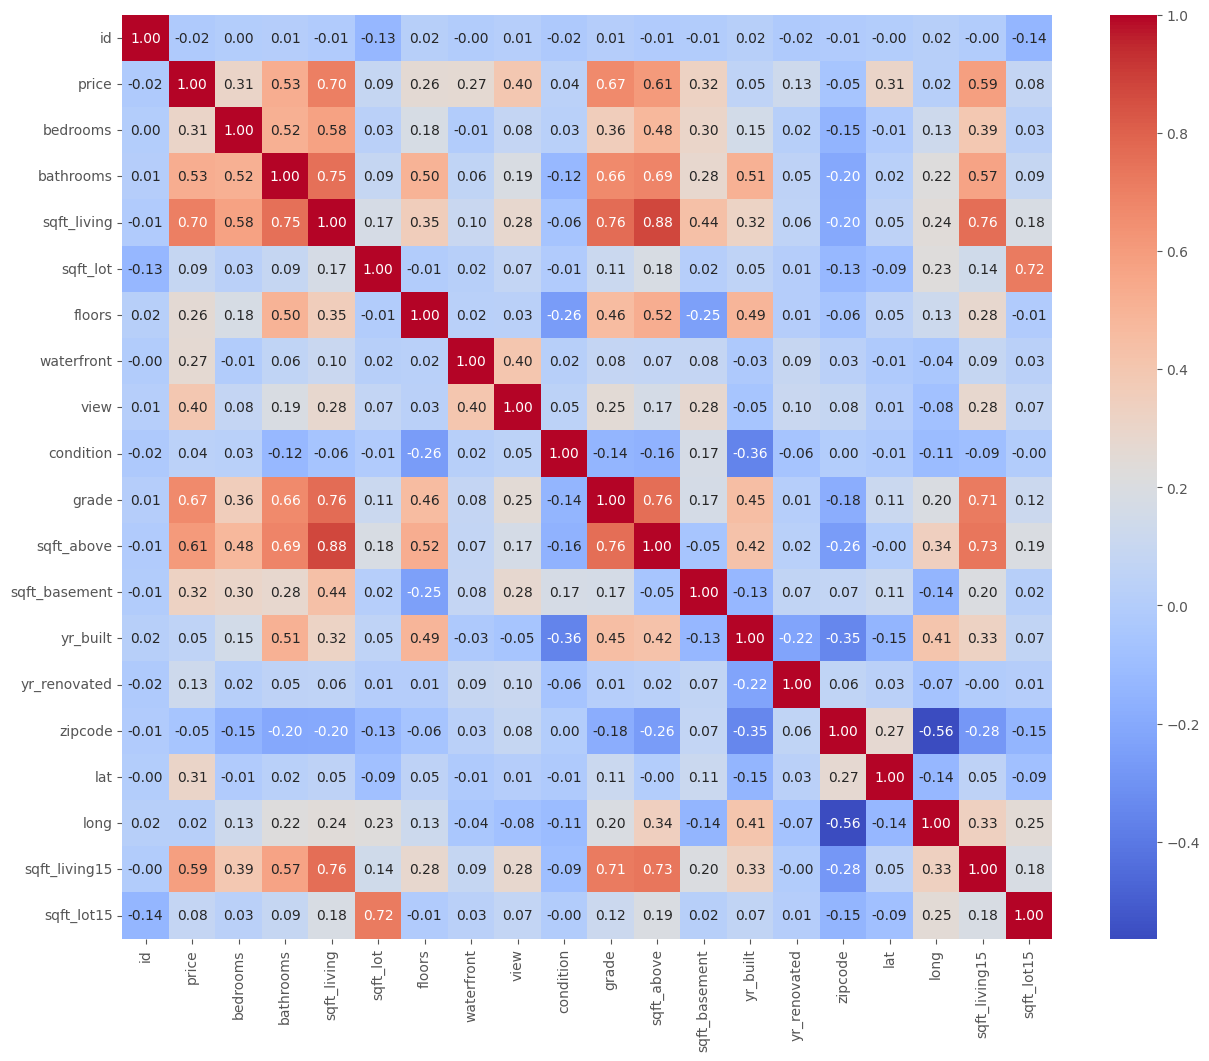

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [11]:
# Matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación como un mapa de calor
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Correlaciones con el precio
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)


Estos coeficientes de correlación te indican la fuerza y dirección de la relación lineal entre cada variable y el precio. Aquí hay algunas observaciones basadas en los valores que has compartido:

Variables con una fuerte correlación positiva con el precio:

sqft_living (0.702035): El área habitable tiene una fuerte correlación positiva con el precio.
grade (0.667434): La calidad de la construcción tiene una fuerte correlación positiva con el precio.
sqft_above (0.605567): El área habitable por encima del suelo tiene una correlación positiva con el precio.
sqft_living15 (0.585379): El área habitable promedio de los 15 vecinos más cercanos tiene una correlación positiva con el precio.
bathrooms (0.525138): El número de baños tiene una correlación positiva con el precio.
Variables con correlaciones moderadas o débiles:

view (0.397293): La vista tiene una correlación moderada con el precio.
sqft_basement (0.323816), lat (0.307003 y bedrooms (0.308350) tienen una correlación moderada con el precio.

Variables con correlaciones bajas o negativas:

waterfront (0.266369): La propiedad frente al agua tiene una correlación positiva, pero no muy fuerte.
floors (0.256794): El número de pisos tiene una correlación positiva, pero no muy fuerte.
Variables con correlaciones cercanas a cero:

date, id, zipcode, long, condition, yr_built: Estas variables tienen correlaciones cercanas a cero y podrían tener una influencia limitada en el precio.

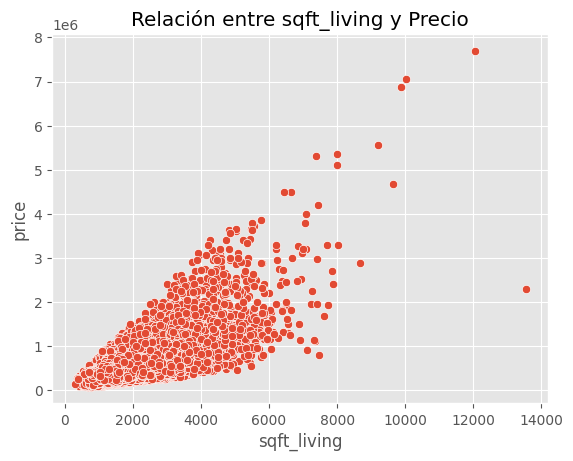

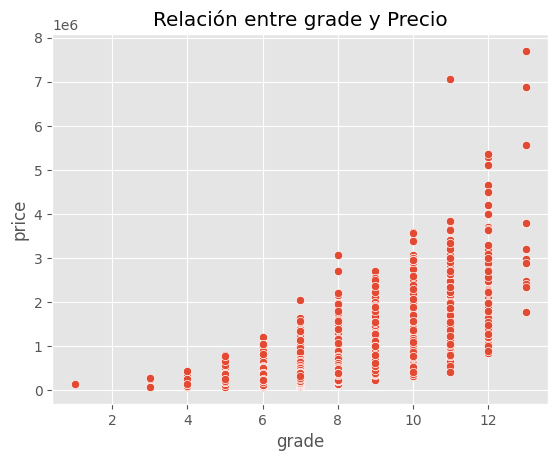

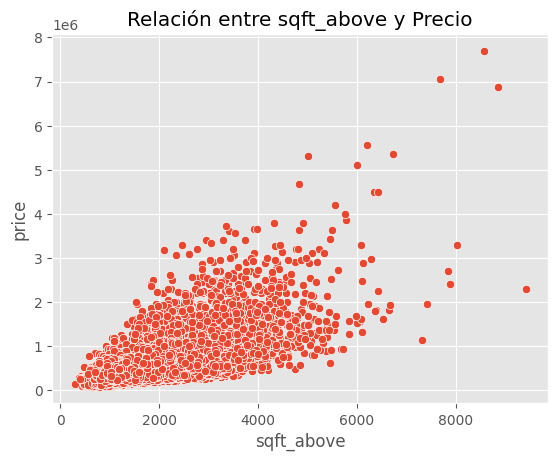

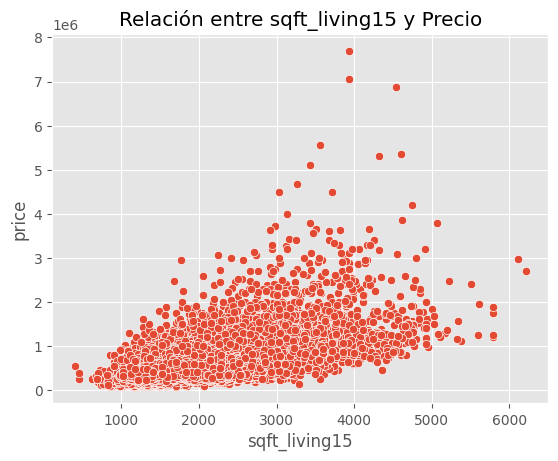

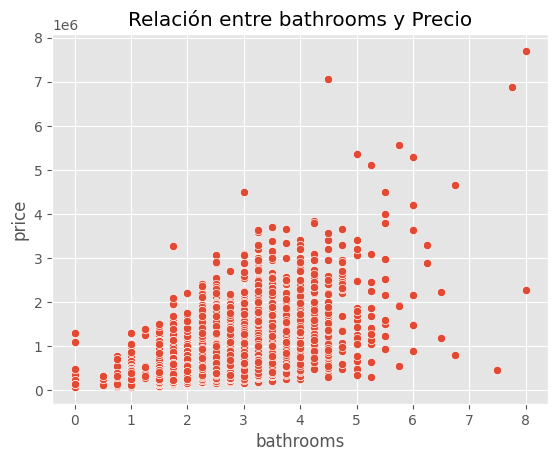

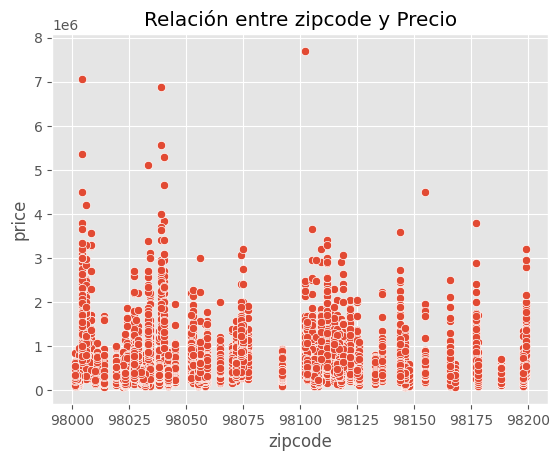

In [12]:
# Variables con correlaciones positivas
positive_correlations = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

# Variables con correlaciones negativas
negative_correlations = ['zipcode']

# Gráficos de dispersión para correlaciones positivas
for feature in positive_correlations:
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Relación entre {feature} y Precio')
    plt.show()

# Gráfico de dispersión para correlación negativa
for feature in negative_correlations:
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Relación entre {feature} y Precio')
    plt.show()

In [13]:
# Convertir la columna de fecha a un formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Eliminar valores atípicos
z_scores = np.abs(zscore(df.drop(['price', 'date'], axis=1)))
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Dividir el conjunto de datos sin valores atípicos
X_no_outliers = df_no_outliers.drop(['price', 'date'], axis=1)
y_no_outliers = df_no_outliers['price']
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_outliers)
X_test_scaled = scaler.transform(X_test_no_outliers)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train_no_outliers)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test_no_outliers, ridge_predictions)
ridge_r2 = r2_score(y_test_no_outliers, ridge_predictions)
print("Ridge Regression - MSE:", ridge_mse)
print("Ridge Regression - R²:", ridge_r2)

# Árbol de Regresión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train_no_outliers)
tree_predictions = tree_model.predict(X_test_scaled)
tree_mse = mean_squared_error(y_test_no_outliers, tree_predictions)
tree_r2 = r2_score(y_test_no_outliers, tree_predictions)
print("Árbol de Regresión - MSE:", tree_mse)
print("Árbol de Regresión - R²:", tree_r2)

Ridge Regression - MSE: 22147347482.195
Ridge Regression - R²: 0.6431802308932479
Árbol de Regresión - MSE: 16743722870.232437
Árbol de Regresión - R²: 0.7302389672918224




Para el árbol de decisión, el MSE es menor que el de la regresión de crestas, lo que indica que el árbol de decisión ha hecho un mejor trabajo al predecir los valores. Así mismo, un R^2 mayor (aproximadamente 0.73) significa que el árbol de decisión ha explicado cerca del 73% de la variabilidad de los datos, lo que es mejor que la regresión de crestas.

In [14]:
 #Lasso Regression
lasso_model = Lasso()
lasso_params = {'alpha': np.logspace(-4, 4, 9)}
lasso_grid = GridSearchCV(lasso_model, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train_scaled, y_train_no_outliers)
lasso_predictions = lasso_grid.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test_no_outliers, lasso_predictions)
lasso_r2 = r2_score(y_test_no_outliers, lasso_predictions)
print("Lasso Regression - Mejores hiperparámetros:", lasso_grid.best_params_)
print("Lasso Regression - MSE:", lasso_mse)
print("Lasso Regression - R²:", lasso_r2)

# Elastic Net
elastic_model = ElasticNet()
elastic_params = {'alpha': np.logspace(-4, 4, 9), 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
elastic_grid = GridSearchCV(elastic_model, elastic_params, scoring='neg_mean_squared_error', cv=5)
elastic_grid.fit(X_train_scaled, y_train_no_outliers)
elastic_predictions = elastic_grid.predict(X_test_scaled)
elastic_mse = mean_squared_error(y_test_no_outliers, elastic_predictions)
elastic_r2 = r2_score(y_test_no_outliers, elastic_predictions)
print("Elastic Net - Mejores hiperparámetros:", elastic_grid.best_params_)
print("Elastic Net - MSE:", elastic_mse)
print("Elastic Net - R²:", elastic_r2)

Lasso Regression - Mejores hiperparámetros: {'alpha': 0.0001}
Lasso Regression - MSE: 22147352293.602978
Lasso Regression - R²: 0.6431801533758168
Elastic Net - Mejores hiperparámetros: {'alpha': 0.01, 'l1_ratio': 0.9}
Elastic Net - MSE: 22146918618.511513
Elastic Net - R²: 0.6431871403906784


Lasso: El MSE es ligeramente mayor que el obtenido con el árbol de decisión, pero el R^2 es prácticamente igual al del modelo de regresión de crestas, lo que significa que aproximadamente el 64% de la variabilidad de los datos es explicada por el modelo Lasso.

Elastic Net es una combinación de Lasso y Ridge Regression, donde la regularización consta de una mezcla de las dos, controlada por los parámetros 'alpha' y 'l1_ratio'. El 'l1_ratio' de 0.9 indica que el modelo está aplicando una combinación de regularizaciones con una fuerte preferencia hacia Lasso.

El MSE para Elastic Net es un poco menor que el de Lasso, indicando que es ligeramente mejor en términos de error de predicción. El R^2 es prácticamente idéntico al de Lasso, lo cual está en línea con el R^2 de los otros modelos que has probado.